# RAG with Google Gemini on Arabic Docs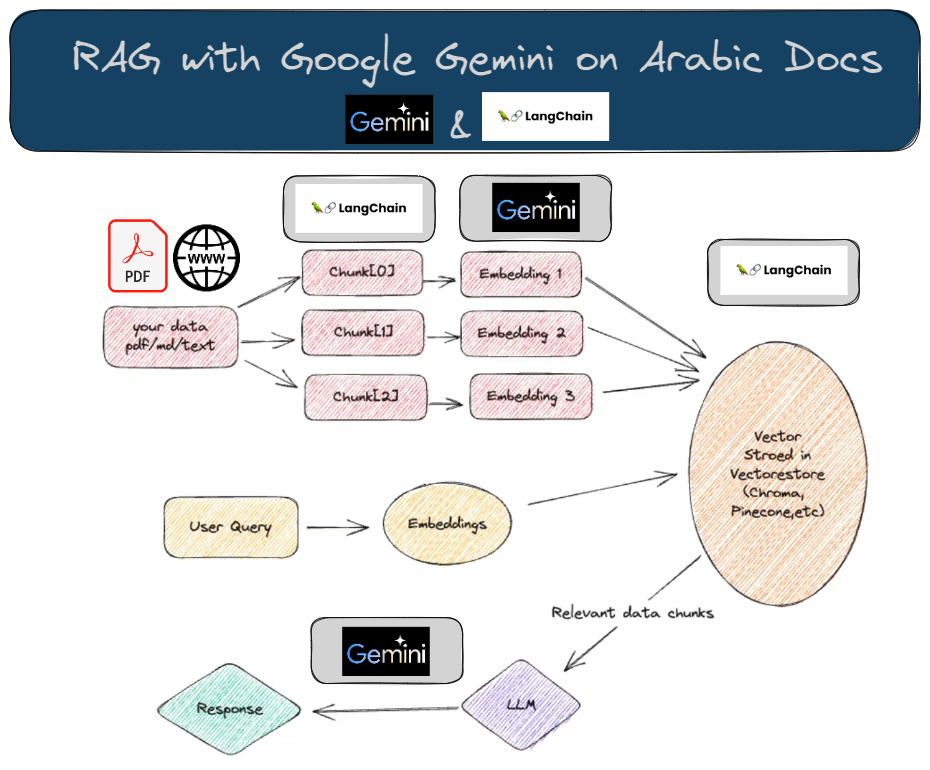

## Connecting and Exploring Google Gemini

In [ ]:
# Enter your Gemini api key like this
from google.colab import userdata
API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = API_KEY

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

### Explore available models

In [ ]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

### Quick test

In [ ]:
prompt_eng = 'would you please introduce yourself in one sentence ?'
prompt_ar = 'هل من الممكن أن تقدم نفسك في جملة واحدة ؟'

model = genai.GenerativeModel('gemini-pro')

response_eng = model.generate_content(prompt_eng)
response_ar = model.generate_content(prompt_ar)

print(f'Answering the english prompt:\n{response_eng.text}\n\nAnswering the english prompt:\n{response_ar.text}')

Answering the english prompt:
I am a large language model, trained by Google.

Answering the english prompt:
أنا نموذج لغوي كبير، تم تدريبي بواسطة جوجل.


## Google's Gemini with LangChain

1. Basic LLM Chain

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)


result = llm.invoke("Are you capable to understand and generate Arabic text?")

Markdown(result.content)

Yes, I am capable of understanding and generating Arabic text. I have been trained on a massive dataset of Arabic text and code, which has allowed me to develop a deep understanding of the Arabic language. I can understand the meaning of Arabic text, and I can generate Arabic text that is both grammatically correct and fluent.

Here are some examples of Arabic text that I have generated:

* **Arabic Text:** مرحبًا بالعالم!
**English Translation:** Hello, world!

* **Arabic Text:** كيف حالك اليوم؟
**English Translation:** How are you today?

* **Arabic Text:** أنا بخير، شكراً.
**English Translation:** I am fine, thank you.

* **Arabic Text:** ما اسمك؟
**English Translation:** What is your name?

* **Arabic Text:** اسمي [Your Name].
**English Translation:** My name is [Your Name].

I am still under development, but I am confident that I will continue to improve my ability to understand and generate Arabic text. I am excited to use my skills to help people communicate with each other in Arabic.

In addition to the examples above, I can also generate Arabic text in a variety of styles, including formal, informal, and poetic. I can also generate Arabic text that is specific to a particular domain, such as business, technology, or medicine.

I am confident that I can help you with any Arabic text generation needs that you may have. Please feel free to contact me if you have any questions.

In [ ]:
for chunk in llm.stream("Generate 100 random name"):
  print(chunk.content)

2. Basic Multi Chain

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)

In [ ]:
prompt = ChatPromptTemplate.from_template(
    "أخبرني بحقيقة واحدة عن {topic}"
    )
output_parser = StrOutputParser()

In [ ]:
chain = prompt | model | output_parser

In [ ]:
Markdown(chain.invoke({"topic": "Tunisia"}))

تونس هي الدولة الوحيدة في العالم التي سميت على اسم عاصمتها.

In [ ]:
countries=['Tunisia', 'Germany', 'Qatar', 'Spain']

In [ ]:
for elm in countries:
  print(elm)
  result = chain.invoke({"topic": elm})
  print(result)

Tunisia
تونس هي الدولة الوحيدة في العالم التي سميت على اسم عاصمتها.
Germany
* ألمانيا هي أكبر اقتصاد في أوروبا، وثالث أكبر اقتصاد في العالم من حيث الناتج المحلي الإجمالي الاسمي.
Qatar
* قطر هي أول دولة في العالم تحصل على لقب "عاصمة الرياضة في العالم" من قبل الاتحاد الدولي للرياضة والتربية البدنية والترفيه (FISPE).
Spain
* إسبانيا هي موطن لأكبر عدد من مواقع التراث العالمي لليونسكو في العالم، حيث يبلغ عددها 49 موقعًا.


## More Complicated Chain - Mini RAG

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.9)

In [ ]:
# Embedding Model
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# Vector Store
vectorstore = DocArrayInMemorySearch.from_texts(
    # mini docs for embedding
    [ "تونس هي دولة في شمال أفريقيا.",
      "عاصمتها تونس، واللغة الرسمية هي العربية.",
      "تونس مشهورة بشواطئها الجميلة وتاريخها الثقافي الغني.",
      "La France est un pays situé en Europe occidentale.",
      "Sa capitale est Paris, et la langue officielle est le français.",
      "La France est connue pour sa cuisine délicieuse, sa mode et sa riche histoire culturelle.",
      "The United Kingdom is a country located off the northwestern coast of mainland Europe.",
      "Its capital is London, and the official language is English.",
      "The UK is famous for its historical landmarks, diverse culture, and contributions to literature and music."],

    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents("what is the capital of Tunisia?")[0]

Document(page_content='Sa capitale est Paris, et la langue officielle est le français.')

In [ ]:
retriever.get_relevant_documents("ما هي عاصمة تونس؟")[0]

Document(page_content='عاصمتها تونس، واللغة الرسمية هي العربية.')

In [ ]:
retriever.get_relevant_documents("ما هي عاصمة المملكة المتحدة؟")[0]

Document(page_content='عاصمتها تونس، واللغة الرسمية هي العربية.')

**==> Using only the embedding model, and the retriever, we couldn't get the accurate context**

In [ ]:
from langchain.schema.runnable import RunnableMap

In [ ]:
template = """Answer the question in a full sentence, based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
retriever.get_relevant_documents("ما هي عاصمة المملكة المتحدة؟")

[Document(page_content='عاصمتها تونس، واللغة الرسمية هي العربية.'),
 Document(page_content='تونس هي دولة في شمال أفريقيا.'),
 Document(page_content='تونس مشهورة بشواطئها الجميلة وتاريخها الثقافي الغني.'),
 Document(page_content='La France est connue pour sa cuisine délicieuse, sa mode et sa riche histoire culturelle.')]

In [ ]:
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
}) | prompt | model | output_parser

In [ ]:
chain.invoke({"question": "ما هي عاصمة المملكة المتحدة؟"})

'السياق لا يحتوي على معلومات عن عاصمة المملكة المتحدة.'

## RAG on a Website

In [ ]:
!pip install -q openai langchain playwright beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.1/212.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.2/613.2 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
!playwright install

In [ ]:
!pip install html2text

In [ ]:
from langchain.document_loaders import AsyncChromiumLoader
from langchain.document_transformers import BeautifulSoupTransformer

In [ ]:
from langchain.document_loaders import AsyncHtmlLoader

urls = ["https://ar.wikipedia.org/wiki/%D8%AC%D8%A7%D8%B0%D8%A8%D9%8A%D8%A9"]
loader = AsyncHtmlLoader(urls)
docs = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00, 13.15it/s]


In [ ]:
from langchain.document_transformers import Html2TextTransformer

html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
web_content = docs_transformed[0].page_content[:]

In [ ]:
Markdown(web_content)

انتقل إلى المحتوى

القائمة الرئيسية

القائمة الرئيسية

انقل للشريط الجانبي أخف

الموسوعة

  * الصفحة الرئيسية
  * الأحداث الجارية
  * أحدث التغييرات
  * أحدث التغييرات الأساسية

تصفح

  * المواضيع
  * أبجدي
  * بوابات
  * مقالة عشوائية
  * تصفح من غير إنترنت

مشاركة

  * تواصل مع ويكيبيديا
  * مساعدة
  * الميدان
  * تبرع

لغات

وصلات اللغة توجد في الجزء العلوي من الصفحة مقابل العنوان.

بحث

بحث

  * إنشاء حساب
  * دخول

أدوات شخصية

  * إنشاء حساب
  * دخول

صفحات للمحررين الذين سجَّلوا خروجهم تعلَّم المزيد

  * مساهمات
  * نقاش

## المحتويات

انقل للشريط الجانبي أخف

  * المقدمة

  * 1الجاذبية في الميكانيكا الكلاسيكية

  * 2مجال الجاذبية

  * 3طبيعة قوى الجاذبية حسب النظريات الفيزيائية

  * 4تاريخ نظرية الجاذبية

ثبِّت القسم الفرعي تاريخ نظرية الجاذبية

    * 4.1الثورة العلمية

    * 4.2دور العرب

    * 4.3قانون نيوتن للثقالة

    * 4.4نظرية النسبية

      * 4.4.1أمواج ثقالية

  * 5اقرأ أيضا

  * 6المراجع

تبديل عرض جدول المحتويات

# جاذبية

157 لغة

  * Afrikaans
  * Alemannisch
  * አማርኛ
  * Aragonés
  * अंगिका
  * الدارجة
  * مصرى
  * অসমীয়া
  * Asturianu
  * अवधी
  * Azərbaycanca
  * تۆرکجه
  * Башҡортса
  * Boarisch
  * Žemaitėška
  * Bikol Central
  * Беларуская
  * Беларуская (тарашкевіца)
  * Български
  * Banjar
  * বাংলা
  * বিষ্ণুপ্রিয়া মণিপুরী
  * Brezhoneg
  * Bosanski
  * Català
  * ᏣᎳᎩ
  * کوردی
  * Čeština
  * Чӑвашла
  * Cymraeg
  * Dansk
  * Deutsch
  * Zazaki
  * Ελληνικά
  * English
  * Esperanto
  * Español
  * Eesti
  * Euskara
  * Estremeñu
  * فارسی
  * Suomi
  * Na Vosa Vakaviti
  * Français
  * Nordfriisk
  * Frysk
  * Gaeilge
  * Kriyòl gwiyannen
  * Gàidhlig
  * Galego
  * Avañe'ẽ
  * Bahasa Hulontalo
  * ગુજરાતી
  * Gaelg
  * עברית
  * हिन्दी
  * Fiji Hindi
  * Hrvatski
  * Magyar
  * Հայերեն
  * Interlingua
  * Bahasa Indonesia
  * Interlingue
  * Ido
  * Íslenska
  * Italiano
  * 日本語
  * Patois
  * La .lojban.
  * Jawa
  * ქართული
  * Taqbaylit
  * Kabɩyɛ
  * Қазақша
  * ಕನ್ನಡ
  * 한국어
  * कॉशुर / کٲشُر
  * Kurdî
  * Кыргызча
  * Latina
  * Lëtzebuergesch
  * Luganda
  * Limburgs
  * Lombard
  * Lietuvių
  * Latviešu
  * Minangkabau
  * Македонски
  * മലയാളം
  * Монгол
  * मराठी
  * Bahasa Melayu
  * Mirandés
  * မြန်မာဘာသာ
  * Plattdüütsch
  * नेपाली
  * नेपाल भाषा
  * Nederlands
  * Norsk nynorsk
  * Norsk bokmål
  * Novial
  * Occitan
  * Oromoo
  * ਪੰਜਾਬੀ
  * Polski
  * پنجابی
  * پښتو
  * Português
  * Runa Simi
  * Română
  * Русский
  * Русиньскый
  * संस्कृतम्
  * Sardu
  * Sicilianu
  * Scots
  * سنڌي
  * Srpskohrvatski / српскохрватски
  * සිංහල
  * Simple English
  * Slovenčina
  * Slovenščina
  * Anarâškielâ
  * ChiShona
  * Soomaaliga
  * Shqip
  * Српски / srpski
  * Seeltersk
  * Sunda
  * Svenska
  * Kiswahili
  * தமிழ்
  * తెలుగు
  * Тоҷикӣ
  * ไทย
  * Tagalog
  * Lea faka-Tonga
  * Türkçe
  * Татарча / tatarça
  * Тыва дыл
  * ئۇيغۇرچە / Uyghurche
  * Українська
  * اردو
  * Oʻzbekcha / ўзбекча
  * Vèneto
  * Vepsän kel’
  * Tiếng Việt
  * Winaray
  * Wolof
  * 吴语
  * მარგალური
  * ייִדיש
  * 中文
  * 文言
  * Bân-lâm-gú
  * 粵語
  * IsiZulu

عدل الوصلات

  * مقالة
  * نقاش

العربية

  * اقرأ
  * عدّل
  * تاريخ

أدوات

أدوات

انقل للشريط الجانبي أخف

إجراءات

  * اقرأ
  * عدّل
  * تاريخ

عام

  * ماذا يصل هنا
  * تغييرات ذات علاقة
  * رفع ملف
  * الصفحات الخاصة
  * وصلة دائمة
  * معلومات الصفحة
  * استشهد بهذه الصفحة
  * احصل على مسار مختصر
  * عنصر ويكي بيانات

طباعة/تصدير

  * إنشاء كتاب
  * تحميل PDF
  * نسخة للطباعة

في مشاريع أخرى

  * ويكيميديا كومنز
  * ويكي الجامعة

من ويكيبيديا، الموسوعة الحرة

هذه المقالة عن الجاذبية. لمعانٍ أخرى، طالع جاذبية (توضيح).

جاذبية

معلومات عامة| يدرسه|

قانون الجذب العام لنيوتن  
النسبية العامة  
  
---|---  
الأسباب|

spacetime curvature (en)  
مادة  
  
تسبب في|

سقوط  
gravitational motion (en)  
  
المكتشف أو المخترع|

إسحاق نيوتن  
  
ممثلة بـ|

gravitational force (en)  
spacetime curvature (en)  
  
النقيض|

non-gravitational force (en)  
  
تعديل \- تعديل مصدري \- تعديل ويكي بيانات  
  
قوة الجاذبية تبقي الكواكب في المجموعة الشمسية ضمن مدار معين.

**الجاذبية** (من فعل جَذَبَ) وتعرف أيضاً باسم **الثَقالة** (من فعل ثَقُلَ) هي
ظاهرة طبيعية يتم بواسطتها تحريك وانجذاب كل الأشياء من الكتلة أو الطاقة -بما في
ذلك الكواكب والنجوم والمجرات وحتى الضوء-[1] نحو بعضها البعض. على الأرض، تعطي
الجاذبية ثقلاً للأجسام المادية (الوزن)، وجاذبية القمر تسبب المد والجزر في
المحيط. تسبب الانجذاب الجاذبي للمادة الغازية الأصلية الموجودة في الكون في
البدء في الاندماج النووي، وتكوين النجوم -وتجميع النجوم معًا في مجرات\- لذا فإن
الجاذبية مسؤولة عن العديد من الهياكل الواسعة النطاق في الكون. على الرغم من ذلك
فإن آثار الجاذبية تصبح أضعف بشكل متزايد على الأشياء البعيدة.

فالوزن على سبيل المثال هو القوة التي تحدثها الجاذبية محدثة الانجذاب بين الأرض
والجسم المعني وهي تساوي جداء تسارع الجاذبية في كتلة الجسم. وكان أول من وضع
نظرية للجاذبية هو الفيزيائي المعروف إسحاق نيوتن وبقيت هذه النظرية صامدة حتى تم
استبدالها من قبل أينشتاين بنظرية النسبية العامة لكن معادلة نيوتن تبقى صحيحة
وأكثر عملية عندما نتحدث عن حقول جاذبية ضعيفة كإرسال المركبات الفضائية
والتطبيقات الهندسية الإنشائية مثل بناء الجسور المعلقة.

انتشر مصطلح _الجاذبية الأرضية_ مبكراً كون فكرة التجاذب كانت راسخة حسب النظرة
النيوتنية، لاحقاً انتشر مصطلحي **الجاذبية** كتعميم لظاهرة التجاذب بين أي
جسمين، ومصطلح **ثقالة** المشتق من الثقل وهو أكثر دلالة على مفهوم نظرية النسبية
للثقالة حيث تعتبر النسبية الثقالة أو الجاذبية مجرد التواء في الزمكان وليس هناك
من أي تجاذب بين الأجسام.[2] بشكل عام قد يكون من الأنسب استخدام مصطلح «جاذبية»
في إطار الميكانيكا الكلاسيكية في حين يستخدم مصطلح «ثقالة» في إطار النسبية
العامة.

## الجاذبية في الميكانيكا الكلاسيكية[عدل]

**قانون الجذب العام لنيوتن** هو قانون استنباطي كمحاولة لوصف قوى الجاذبية بين
الأجسام غير المشحونة، وقد استنبطه نيوتن من خلال مشاهدات فلكية عديدة
وبالاستعانة بقوانين كيبلر لحركة الكواكب. كان البيروني والخازني أيضاً قد أشارا
لهذا المفهوم قبلهما بسبعة قرون تقريباً.

ينص قانون الجاذبية العام لنيوتن: قوتا التجاذب بين جسمين ماديين تتناسب طردياً
مع حاصل ضرب كتلتيهما وعكسياً مع مربع المسافة بين مركزيهما.

صورة توضيحية لقانون نيوتن للجذب العام (الصورة القياسية)

  * **الصورة القياسية لقانون الجذب العام لنيوتن**

     F = G m 1 m 2 r 2 {\displaystyle F=G{\frac {m_{1}m_{2}}{r^{2}}}}

حيث:

     F {\displaystyle F\ } هي القوة الناتجة عن الجاذبية
     G {\displaystyle G\ } هو ثابت الجذب العام بين الكتل
     m 1 {\displaystyle m_{1}\ } هي كتلة الجسم الأول
     m 2 {\displaystyle m_{2}\ } هي كتلة الجسم الثاني
     r {\displaystyle r\ } هو المسافة بين مركزي الجسمين

  * **الصورةالاتجاهية لقانون الجذب العام لنيوتن**

     F -> 12 = − F -> 21 = − G m 1 m 2 | r -> 12 | 2 r ^ 12 {\displaystyle {\vec {F}}_{12}=-{\vec {F}}_{21}=-G{m_{1}m_{2} \over {\vert {\vec {r}}_{12}\vert }^{2}}\,{\hat {r}}_{12}}

حيث:

     F -> 12 {\displaystyle {\vec {F}}_{12}} هو متجه القوة التي يؤثر بها الجسم 1 على الجسم 2
     F -> 21 {\displaystyle {\vec {F}}_{21}} هو متجه القوة التي يؤثر بها الجسم 2 على الجسم 1
     G {\displaystyle G\ } هو ثابت الجذب العام بين الكتل
     m 1 {\displaystyle m_{1}\ } و m 2 {\displaystyle m_{2}\ } هما كتلتا الجسمين على الترتيب
     | r -> 12 | = | r -> 2 − r -> 1 | {\displaystyle \vert {\vec {r}}_{12}\vert \ =\vert {\vec {r}}_{2}-{\vec {r}}_{1}\vert } هو البعد بين الجسيمين (أي مقدار المتجه الذي هو مقدار الفرق بين متجهي موضع الجسيمين)
     r ^ 12 = d e f r -> 2 − r -> 1 | r -> 2 − r -> 1 | {\displaystyle {\hat {r}}_{12}\ {\stackrel {\mathrm {def} }{=}}\ {\frac {{\vec {r}}_{2}-{\vec {r}}_{1}}{\vert {\vec {r}}_{2}-{\vec {r}}_{1}\vert }}} هو وحدة متجه للمتجه من 1 إلى 2

هذا القانون مثل معظم قوانين الميكانيكا الكلاسيكية يطبق على الأجسام النقطية
(الجسيمات) أما الأجسام الكبيرة ذات الأشكال المختلفة فنعمد إلى تطبيق حسبان
التكامل من أجل الحصول على شدة قوة الجاذبية المطبقة عليها.

ويمكن ملاحظة أن الصورة الاتجاهية لقانون الجذب العام لنيوتن هي نفس الصورة
القياسية، إلا أن F الآن كمية متجهة، ويتم ضرب الجانب الأيمن بمتجه الوحدة
المناسب.

## مجال الجاذبية[عدل]

طالع أيضًا: حقل جاذبية

مجال الجاذبية هو مجال متجه الذي يصف قوة الجاذبية التي سيتم تطبيقها على أي جسم
في نقطة معينة في الفضاء، لكل وحدة الكتلة. هو في الواقع يساوي تسارع الجاذبية
عند تلك النقطة. وهو تعميم لنموذج المتجه، الذي يصبح مفيداً بشكل خاص إذا تم
إشراك أكثر من جسمين (مثل صاروخ بين الأرض والقمر)، بالنسبة لجسمين (الجسم الأول
الأرض، والجسم الثاني صاروخ)، سنكتب r بدلاً من r12 وm بدلا من m2 وبالتالي يمكن
تحديد مجال الجاذبية (g(r على النحو التالي:

     g ( r ) = − G m 1 | r | 2 r ^ {\displaystyle g(r)=-G{\frac {m_{1}}{{\vert \ r\vert }^{2}}}{\hat {r}}}

وبالتالي يمكن كتابة:

     F ( r ) = m g ( r ) {\displaystyle F(r)=mg(r)}

## طبيعة قوى الجاذبية حسب النظريات الفيزيائية[عدل]

تعتبر قوة الجاذبية في الميكانيكا الكلاسيكية قوة مباشرة بعيدة المدى بمعنى أن
هذه القوة تستطيع التأثير عن بعد بدون واسطة ويتم تأثيرها بشكل لحظي فأي تغير في
موقع أحد الجسمين يرافقه تحول لحظي في الجاذبية بينه وبين الجسم الآخر، ولكي يفسر
اسحاق نيوتن هذه الخاصية عمد إلى تعريف حقل جاذبية كوني موجود في كل نقطة من
الفضاء. هذا الحقل هو حقل إتجاهي يعبر عنه بمتجه في كل نقطة ويمثل قوة الجاذبية
التي تتعرض لها وحدة الكتل عندما توضع في هذه النقطة.

تنص نظرية **النسبية العامة** لآينشتاين على أن وجود أي شكل من أشكال المادة أو
الطاقة أو العزم يحدث انحناء في الزمكان، وبسبب هذا الانحناء فان المسارات التي
تسلكها الأجسام في الأطر المرجعية القصورية يمكن أن تنحرف أو تغير اتجاهها ضمن
الزمن. وهذا الانحراف يظهر لنا على أنه تسارع نحو الأجسام الكبيرة وعرفه نيوتن
بأنه ثقالة أو جاذبية. وبالتالي فان النسبية العامة ترى تسارع الجاذبية أو السقوط
الحر بأنه حركة قصورية فعليا (منتظمة) في حين أن المراقب هو من يتحرك حركة
متسارعة، وهذا ما يعرف ب مبدأ التكافؤ.

## تاريخ نظرية الجاذبية[عدل]

### الثورة العلمية[عدل]

تشير الكتب التاريخية إلى أن العرب كانوا قد عرفوا عن الجاذبية وتأثيراتها إلا أن
العمل على نظرية «الجاذبية الحديثة» في أواخر القرن السادس عشر وبداية القرن
السابع عشر حيث قام غاليليو بتجربته الشهيرة التي رمى فيها كرات ذات كُتَل مختلفة
من أعلى برج بيزا وبيّن ان سرعة وصول الجسم للأرض لا تتعلق بكتلته. لاحقاً قام
أيضاً بتجربة دحرجة الكرات على سطح مائل واستنتج منها أن السبب الذي قد يؤدي إلى
وصول الأجسام الأثقل للأرض قبل الأجسام الأخف في بعض الأحيان هو احتكاك الهواء في
الغلاف الجوي بالجسم.[بحاجة لمصدر]

### دور العرب[عدل]

عرف علماء العرب منذ القرن التاسع للميلاد قوة التثاقل الناشئة عن جذب الأرض
للأجسام وأطلقوا عليها آنذاك اسم «القوة الطبيعية».

يعد الهمداني من أوائل العلماء التجريبين الذين أشاروا إلى الجاذبية بوضوح كما
جاء في كتاب «الجوهرتين العتيقتين» بقولهِ: «فمن كان تحتها (أي تحت الأرض عند
الأسفل) فهو في الثابت في قامته كمن فوقها، ومسقطه وقدمه إلى سطحها الأسفل كمسقطه
إلى سطحها الأعلى، وكثبات قدمهِ عليها، فهي بمنزلة حجر المغناطيس الذي تجذب قواه
الحديد إلى كل جانب..».[3] كذلك أدرك علماء العرب وفلاسفتهم أن هذه القوة تتعاظم
كلما كبر حجم الجسم، كما في قول ابن سينا في القرن الرابع الهجري / العاشر
الميلادي في كتابه (الإشارات والتنبيهات)

«القوة في الجسم الأكبر، إذا كانت مشابهة للقوة في الجسم الأصغر حتى لو فصل من
الأكبر مثل الأصغر، تشابهت القوتان بالاطلاق، فانها في الجسم الأكبر أقوى وأكثر،
إذ فيها من القوة شبيه تلك» – كتاب الإشارات والتنبيهات

وزيادة وقف علماء العرب والمسلمين تماماً الجاذبية الأرضية ويتضح ذلك جلياً في
كتاباتهم، منها ما جاء على لسان أبي الريحان البيروني في كتابه (القانون
المسعودي) حيث قال:

«الناس على الأرض منتصبوا القامات كاستقامة أقطار الكرة وعليها أيضاً تؤول
الأثقال إلى أسفل»

ومنها ما جاء في كتابات الخازني حيث قال

«إن الأجسام الساقطة تنجذب نحو مركز الأرض وإن اختلاف قوة الجذب يرجع إلى المسافة
بين الجسم الساقط وهذا المركز» – كتاب ميزان الحكمة

وقال أيضا:

«الجسم الثقيل هو الذي يتحرك بقوة ذاتية أبداً إلى مركز العالم، أعني أن الثقل هو
الذي لهُ قوة الحركة إلى نقطة المركز» – كتاب ميزان الحكمة

كما شبّه الإدريسي جاذبية الأرض بجذب المغناطيس للحديد، لما قال في كتابهِ نزهة
المشتاق في اختراق الآفاق:

«الأرض جاذبة لما في أبدانها من أثقال بمنزلة حجر المغناطيس الذي يجذب الحديد»

### قانون نيوتن للثقالة[عدل]

في سنة 1687 نشر عالم الفيزياء والرياضيات الإنكليزي إسحاق نيوتن نظريته الشهيرة،
وهي أن الأجسام تجذب بعضها البعض تبعاً لكتلتها، وتعتمد قوة الجاذبية على مربع
المسافة بين الجسمين المتجاذبين. وبكلماته: «استنتجت من هذا أن القوة التي تُبقي
الكواكب في مساراتها متعلقة بتربيع البعد بين مركزيهما. من هنا قارنت القوة التي
تمسك القمر في مساره بالقوى على سطح الأرض ووصلت إلى نتيجة قريبة جدا».[4]

### نظرية النسبية[عدل]

في أوائل القرن العشرين وفي بحثين نُشر أولهما في عام 1905 وثانيهما في عام 1915،
حيث عدل مفهوم الجاذبية من قبل الفيزيائي الشهير ألبرت آينشتاين. فحسب نظرية
نيوتن كانت الجاذبية هي قوة، بينما أثبتت النظرية النسبية أن الجاذبية هي مجال.
فحسب النسبية، الجاذبية هي عبارة عن انحناءات في الفراغ تُسببها الكتلة. فكلما
كانت كتلة الجسم أكبر كلما كبر انحناء الفضاء حولهُ. والأجسام الأقل كتلة سوف تقع
في هذا الانحناء الذي صنعهُ الجسم الأول، وبالتالي سيأسرها بجاذبيتهِ. بهذا
التفسير الجديد المدهش **للجاذبية** ، وبدمج البعد الزماني الرابع بالأبعاد
المكانية الثلاث، أصبحت النسبية واحدة من النظريتين الأكثر شهرة وأهمية في القرن
العشرين مع نظرية الكم.

#### أمواج ثقالية[عدل]

طالع أيضًا: موجة ثقالية

تنص النظرية النسبية العامة على أن أمواج من الجاذبية تنبثق من تذبذب الزمكان، ما
يمكن ان يحصل عندما يدور جسمان حول بعضهما. أمواج الجاذبية الصادرة من مجموعتنا
الشمسية أصغر مما نستطيع قياسه، ولكن تم رصد أمواج جاذبية بطريقة غير مباشرة في
فقدان الطاقة لنجمان نباضان يدوران حول بعضهما. في فبراير 2016 أعلن مركز LIGO عن
رصدهِ لاكتشاف أمواج ثقالية صادرة عن اصطدام ثقبان أسودان ببعضهما على بعد 1.3
بيلون سنة ضوئية من الأرض.[5][6]

## اقرأ أيضا[عدل]

  * تمدد الزمن الثقالي
  * إسحاق نيوتن
  * ثابت الجاذبية
  * يوهانز كبلر
  * مغناطيسية الجاذبية
  * قياس الثقالة
  * جاذبية فائقة
  * كيناماتيكا النجوم
  * جاذبية الكم الظاهرية

## المراجع[عدل]

  1. **^** Comins، Neil F.؛ Kaufmann، William J. (2008). _Discovering the Universe: From the Stars to the Planets_. MacMillan. ص. 347\. Bibcode:2009dufs.book.....C. ISBN:978-1429230421. مؤرشف من الأصل في 2020-01-25.
  2. **^** "HubbleSite: Black Holes: Gravity's Relentless Pull". _hubblesite.org_. مؤرشف من الأصل في 2018-12-26. اطلع عليه بتاريخ 2016-10-07.
  3. **^** قوانين الحركة والجاذبية.. اكتشاف نيوتن أم المسلمين؟ \- موقع قصة الإسلام نسخة محفوظة 30 أكتوبر 2016 على موقع واي باك مشين.
  4. **^** *Chandrasekhar، Subrahmanyan (2003). _Newton's Principia for the common reader_. Oxford: Oxford University Press. (pp.1–2). The quotation comes from a memorandum thought to have been written about 1714.
  5. **^** Clark, Stuart (11 Feb 2016). "Gravitational waves: breakthrough discovery announced - as it happened". _The Guardian_ (بالإنجليزية البريطانية). ISSN:0261-3077. Archived from the original on 2018-06-22. Retrieved 2017-01-01.
  6. **^** Castelvecchi، Davide؛ Witze، Alexandra. "Einstein's gravitational waves found at last". _Nature_. DOI:10.1038/nature.2016.19361. مؤرشف من الأصل في 2019-09-09.

**جاذبية** في المشاريع الشقيقة:  
---  
|

  * صور وملفات صوتية من كومنز.
  * دروس من ويكي الجامعة.

  
  
  * ع
  * ن
  * ت

فروع الفيزياء  
  
---  
أقسام|

  * فيزياء نظرية
    * فيزياء محوسبة
  * فيزياء تجريبية
  * فيزياء تطبيقية

  
  
الفيزياء التقليدية|

  * الميكانيكا التقليدية
    * نيوتنية
    * تحليلية
    * المتصل
      * الموائع
    * السماوية
  * الديناميكا الحرارية
    * الميكانيكا الإحصائية
    * ترموديناميك اللاتوازن
  * الكهرومغناطيسية التقليدية
  * البصريات
    * الأشعة
    * الموجات
  * علم الصوت

  
  
الفيزياء الحديثة|

  * ميكانيكا الكم
  * الميكانيكا النسبية
    * الخاصة
    * العامة
  * فيزياء الجسيمات
  * الفيزياء النووية
  * نظرية الحقل الكمومي
  * فيزياء ذرية وجزيئية وبصرية
    * الفيزياء الذرية
    * الفيزياء الجزيئية
    * البصريات الحديثة
  * فيزياء المواد المكثفة

  
  
الفيزياء مع  
العلوم الأخرى|

  * الفيزياء الفلكية
  * علم الكون الفيزيائي
  * فيزياء الغلاف الجوي
  * الفيزياء الحيوية
  * الفيزياء الكيميائية
  * الفيزياء الهندسية
  * فيزياء الأرض
  * علم المواد
  * الفيزياء الرياضية
  * الفيزياء الطبية
  * علم المحيطات الفيزيائي
  * علم المعلومات الكمية

  
  
انظر أيضا|

  * تاريخ الفيزياء
  * جائزة نوبل في الفيزياء
    * قائمة الفائزين
  * الجدول الزمني لاكتشافات الفيزياء الأساسية
  * تعليم الفيزياء
  * الاتحاد الدولي للفيزياء البحتة والتطبيقية
  * فلسفة الفيزياء

  
  
بوابة الفيزياء  
  
  * ع
  * ن
  * ت

التآثرات الأساسية في الفيزياء  
  
---  
القوى الفيزيائية|

  * تآثر قوي
    * أساسي
    * باقي
  * تآثر كهروضعيف
    * قوة نووية ضعيفة
    * كهرومغناطيسية
  * الجاذبية

  
  
إشعاعات|

  * موجة كهرومغناطيسية
  * موجة ثقالية

  
  
القوى الافتراضية|

  * القوة الخامسة
  * الجوهر
  * تخمين الجاذبية الضعيفة

  
  
  * قائمة المصطلحات الفيزيائية
  * فيزياء الجسيمات
  * فلسفة الفيزياء
  * فضاء كوني
  * كون ضعيف

  
  
  * ع
  * ن
  * ت

علم الفلك  
  
---  
عام|

  * تاريخ علم الفلك

  
  
علم الفلك الرصدي|

|

الأنواع

|

  * أشعة غاما
  * الأشعة السينية
  * الأشعة فوق البنفسجية
  * البصري
  * الأشعة تحت الحمراء
  * الراديوي

  
  
---|---  
  
أجرام الفلكية

|

  * مجرات
  * نجوم
  * كواكب
  * كواكب قزمة
  * أجرام صغيرة (نيازك
  * مذنبات
  * كويكبات)
  * بقايا نجوم (ثقوب سوداء
  * نجوم نيوترونية
  * أقزام سوداء)
  * بقايا مستعر أعظم

  
  
علم الفلك النظري|

  * الفيزياء الفلكية
  * نسبية خاصة
  * نسبية عامة
  * قوانين نيوتن
  * قوانين كبلر
  * قانون هابل
  * تأثير دوبلر
  * المادة الافتراضية (المادة المظلمة
  * الطاقة المظلمة
  * المادة المضادة)
  * قانون بود

  
  
التصنيف  
  
  * ع
  * ن
  * ت

النجوم  
  
---  
التطور|

  * تكون النجوم
  * نجم قبل النسق الأساسي
  * النسق الأساسي
  * رأس فرع العملاق الأحمر
  * فرع العملاقة الحمراء
  * الفرع الأفقي
  * عملاق مقارب
  * تجريف
  * شريحة متقلبة
  * متثاقل أحمر
  * شبة هالك
  * نجوم الأعجوبة
  * سديم كوكبي
  * سديم كوكبي أولي
  * متألق أحمر متعاظم
  * متغير أزرق شديد الضياء
  * نجم وولف-رايت
  * جمهرة النجوم
  * مستعر أعظم مخادع
  * مستعر أعظم
  * مستعر فوق عظيم
  * رسم هرتزبرونغ-راسل
  * رسم هرتزبرونغ-راسل
  * خط بياني لون–لون

  
  
نجم أولي|

  * سحابة جزيئية
    * منطقة هيدروجين II
  * كرة بوك
  * أجسام نجمية فتية
  * جرم هيربج هارو
  * مسار هياشي
  * مسار هينيي
  * جبار
    * نجم T الثور
    * إف يو الجبار
  * نجم هيربيغ Ae/Be

  
  
درجة اللمعان|

  * نجم شبه قزم
  * قزم
    * قزم أزرق
    * قزم أحمر
    * قزم أبيض
    * قزم أسود
    * قزم بني
  * شبه عملاق
  * نجم عملاق
    * عملاق أزرق
    * عملاق أحمر
  * عملاق ساطع
  * عملاق ضخم
    * عملاق أزرق ضخم
    * عملاق أحمر ضخم
    * أصفر
  * عملاق فائق
    * أصفر
  * نجم أزرق شارد

  
  
تصنيف نجمي|

  * نجوم النسق الأساسي نوع-O
  * B
  * A
  * F
  * نجوم النسق الأساسي نوع-G
  * K
  * قزم أحمر
  * Be
  * OB
  * نجم B شبه قزم
  * نوع-متأخر
  * متميز
    * نجم إيه إم
    * نجوم Ap وBp
      * متذبذبة
    * نجوم الباريوم
    * كاربون
    * نجم CH
    * نجم هيليوم متطرف
    * لامدا العواء
    * نجم رصاصي
    * زئبق-منغنيز
    * S
    * نجم قذيفي
    * نجم تكنيشيوم

  
  
بقايا|

  *     * قزم أبيض
    * قزم أسود
    * كوكب هيليوم
  * نجم نيوتروني
    * نباض
    * نجم مغناطيسي
  * ثقب أسود نجمي
  * بقايا نجمية متراصة
    * نجم كواركي
    * نجم غريب
  * Stellar core: EF النهر

  
  
نجوم افتراضية|

  * نجم مظلم
  * نجم مجمد
  * شبيه النجم
  * جسم ثورن-زيتكوف
  * نجم حديدي

  
  
تفاعلات الانصهار النجمي|

  * عملية ألفا
  * تخليق العناصر
  * تفاعل بروتون-بروتون المتسلسل
  * وميض هيليوم
  * دورة كربون-نيتروجين-أكسجين
  * احتراق الليثيوم
  * عملية احتراق الكربون
  * عملية احتراق النيون
  * عملية احتراق الأكسجين
  * عملية احتراق السيليكون
  * عملية التقاط النيوترون البطيئة
  * عملية التقاط النيوترون السريعة
  * الفيوزر
  * مستعر
    * بقايا مستعر

  
  
البنية|

  * نواة الشمس
  * منطقة الحمل الحراري
    * اضطراب جزئي
    * تذبذبات
  * منطقة الإشعاع
  * غلاف النجم الجوي
    * غلاف ضوئي
    * كلف نجمي
    * غلاف لوني
    * هالة (فضاء)
  * ريح نجمي
    * فقاعة
  * أستيروسيسمولوجي
  * حد إدنجتون
  * آلية كلفن هلمهولتز

  
  
خصائص|

  * تسمية النجوم
  * ديناميكا
  * درجة الحرارة الفعالة
  * علم حركة النجوم
  * المجال المغناطيسي
  * قدر
    * قدر مطلق
  * كتلة نجمية
  * معدنية
  * دوران
  * نظام القياس الضوئي UBV
  * نجم متغير

  
  
نظام نجمي|

  * نجم ثنائي
    * ثنائي متصل
    * مغلف مشترك
  * نظام نجمي
  * قرص مزود
  * نظام كوكبي
  * المجموعة الشمسية

  
  
ملاحظات بأعتبار الأرض -نقطة مركزية  
للرصد|

  * كوكبات قطبية
    * نجوم أبدية الظهور
    * نجم القطب
  * قدر
    * القدر الظاهري
    * الإخماد الفلكي
    * تصوير ضوئي
    * خط بياني لون–لون
  * سرعة شعاعية
  * حركة خاصة
  * تزيح
  * المنظور النجمي
  * قياس ضوء النجوم المعيارية

  
  
قائمة النجوم|

  * قائمة أسماء النجوم التقليدية
    * قائمة أسماء النجوم العربية
    * الصينية
  * قائمة أكثر النجوم ضخامة
  * النجوم الخفيفة
  * قائمة أكبر النجوم
  * قائمة أشد النجوم لمعانا
    * تاريخيا
    * قائمة النجوم المحددة للملاحة
  * الأكثر ضياء
  * قائمة أقرب النجوم إلينا
    * نجوم لامعة قريبة
  * نجوم مستضيفة
  * الأقزام البنية
  * الثقوب السوداء
  * قائمة السدم الكوكبية
  * قائمة المستعرات في مجرة درب التبانة
  * قائمة المستعرات الأعظمية
  * قائمة بقايا المستعرات العظيمة
  * قائمة مرشحي المستعر الأعظم
  * قائمة جزيئات الأقراص حول النجمية والوسط بين النجمي
  * Timeline of stellar astronomy

  
  
مقالات ذات صلة|

  * جرم دون نجمي
    * قزم بني
    * قزم بني
    * كوكب
  * عنقود نجمي
    * علم حركة النجوم
    * عنقود مفتوح
    * عنقود مغلق
    * عنقود نجمي فائق
  * سنة مجرية
  * مجرة
  * عنقود مجري هائل
  * علم الرجفات الشمسية
  * نجم زائر
  * كوكبة
  * مجمة
  * جاذبية
  * نجم بين المجرات
  * سحابة داكنة تحت حمراء
  * قزم بني
    * قزم شبه بني
  * تصادم النجوم
  * غلاف حول نجمي

  
  
**بوابة نجوم**  
  
  * ع
  * ن
  * ت

نظريات الجاذبية  
  
---  
المعيار|

| جاذبية نيوتونية|

  * قانون الجذب العام لنيوتن
  * تاريخ نظرية الجاذبية

  
  
---|---  
النسبية العامة|

  * مدخل إلى النسبية العامة
  * تاريخ النسبية العامة
  * رياضيات النسبية العامة
  * اختبارات النسبية العامة
  * Post-Newtonian formalism
  * Linearized gravity
  * ADM formalism

  
  
بدائل  
النسبية العامة|

| نماذج|

  * Classical theories of gravitation
  * جاذبية كمية
  * نظرية كل شيء

  
  
---|---  
كلاسيكية|

  * Einstein–Cartan
  * Bimetric theories
  * Gauge theory gravity
  * Teleparallelism
  * Composite gravity
  * _f_ ( _R_ ) gravity
  * Massive gravity
  * ديناميكا نيوتن المعدلة
  * Nonsymmetric gravitation
  * Scalar–tensor theories
    * برانز-ديك
  * Scalar–tensor–vector
  * Conformal gravity
  * Scalar theories
    * Nordström
  * Whitehead
  * Geometrodynamics
  * Induced gravity
  * Tensor–vector–scalar
  * Chameleon
  * Pressuron

  
  
تكميم|

* Euclidean quantum gravity
* Canonical quantum gravity

  * Wheeler–DeWitt equation
  * جاذبية كمية حلقية
  * Spin foam

* التثليث الديناميكي السببي
* Causal sets
* نموذج DGP  
  
توحيد|

* نظرية كلوزا-كلاين

  * ديلاتون

* جاذبية فائقة  
  
توحيد  
وتكميم|

  * نظرية الحقل الكمومي اللاتبديلي
    * Self-creation cosmology
  * Semiclassical gravity
  * Superfluid vacuum theory
    * Logarithmic BEC vacuum
  * نظرية الأوتار
    * نظرية-إم
    * F-theory
    * Heterotic string theory
    * Type I string theory
    * Type 0 string theory
    * نظرية الأوتار البوزونية
    * نظرية أوتار النوع الثاني
    * نظرية الأوتار الصغيرة
  * Twistor theory
    * Twistor string theory

  
  
تعميمات /  
وامتدادات للنسبية العامة|

  * النسبية القياسية
  * Liouville gravity
  * Lovelock theory
  * (2+1)-dimensional topological gravity
  * Gauss–Bonnet gravity
  * Jackiw–Teitelboim gravity

  
  
نظريات ما قبل نيوتونية  
ونماذج لعبة|

  * فيزياء أرسطية
  * CGHS model
  * RST model
  * التفسيرات الميكانيكية
    * Fatio–Le Sage
    * Entropic gravity
  * التآثر الجذبوي للمادة المضادة

  
  
  * بوابة الفضاء
  * بوابة الفيزياء
  * بوابة المجموعة الشمسية
  * بوابة رحلات فضائية
  * بوابة علم الفلك
  * بوابة علم الكون
  * بوابة علم طبيعة الأرض
  * بوابة علوم
  * بوابة نجوم

ضبط استنادي  
  
---  
وطنية|

  * المكتبة القومية الإسبانية (BNE)
  * المكتبة الوطنية الفرنسية (BnF)
  * الملف الاستنادي المتكامِل (GND)
  * المكتبة القومية الإسرائيلية (J9U)
  * مكتبة الكونغرس (LCNAF)
  *   * قاعدة البيانات الوطنية التشيكية (NLCR AUT)
  * المكتبة القومية الكوريَّة (NLK)

  
  
أخرى|

  * موسوعة أوكرانيا الحديثة (ESU)
  * النظام الجامعي للتوثيق (IdRef)

  
  
مجلوبة من «https://ar.wikipedia.org/w/index.php?title=جاذبية&oldid=65677864»

تصنيفات:

  * جاذبية
  * تسارع
  * قوانين تجريبية

تصنيفات مخفية:

  * قالب أرشيف الإنترنت بوصلات واي باك
  * صيانة الاستشهاد: استشهادات بمسارات غير مؤرشفة
  * الاستشهاد بمصادر باللغة الإنجليزية البريطانية (en-gb)
  * صفحات تستخدم خاصية P2579
  * صفحات تستخدم خاصية P828
  * صفحات تستخدم خاصية P1542
  * صفحات تستخدم خاصية P61
  * صفحات تستخدم خاصية P1552
  * صفحات تستخدم خاصية P461
  * صفحات تستخدم وحدة بطاقة/بلا مدخلات
  * صفحات تستخدم وحدة بطاقة
  * مقالات تستعمل قوالب معلومات
  * صفحات تستخدم خاصية P18
  * جميع المقالات التي بها عبارات بحاجة لمصادر
  * مقالات ذات عبارات بحاجة لمصادر منذ أبريل 2019
  * مقالات ربما تستخدم اقتباسات عربية بحاجة لمراجعة
  * بوابة الفضاء/مقالات متعلقة
  * بوابة الفيزياء/مقالات متعلقة
  * بوابة المجموعة الشمسية/مقالات متعلقة
  * بوابة رحلات فضائية/مقالات متعلقة
  * بوابة علم الفلك/مقالات متعلقة
  * بوابة علم الكون/مقالات متعلقة
  * بوابة علم طبيعة الأرض/مقالات متعلقة
  * بوابة علوم/مقالات متعلقة
  * بوابة نجوم/مقالات متعلقة
  * جميع المقالات التي تستخدم شريط بوابات
  * مقالات فيها معرفات BNE
  * مقالات فيها معرفات BNF
  * مقالات فيها معرفات GND
  * مقالات فيها معرفات J9U
  * مقالات فيها معرفات LCCN
  * مقالات فيها معرفات NDL خاطئة
  * كل المقالات التي تحوي معلومات ضبط استنادي خاطئة
  * مقالات فيها معرفات NKC
  * مقالات فيها معرفات NLK
  * مقالات فيها معرفات EMU
  * مقالات فيها معرفات SUDOC

  * آخر تعديل لهذه الصفحة كان يوم 11 يناير 2024، الساعة 12:35.
  * النصوص متاحة تحت رخصة المشاع الإبداعي الملزمة بنسبة العمل لمؤلفه وبترخيص الأعمال المشتقة بالمثل 4.0؛ قد تُطبّق شروط إضافية. استخدامُك هذا الموقع هو موافقةٌ على شروط الاستخدام وسياسة الخصوصية. ويكيبيديا ® هي علامة تجارية مسجلة لمؤسسة ويكيميديا، وهي منظمة غير ربحية.

  * سياسة الخصوصية
  * حول ويكيبيديا
  * إخلاء مسؤولية
  * القواعد السلوكية
  * المطورون
  * إحصائيات
  * بيان تعريف الارتباطات
  * نسخة للأجهزة المحمولة

  *   * 

  * تبديل عرض المحتوى المحدود

  *[ع]: عرض هذا القالب
  *[ن]: ناقش هذا القالب
  *[ت]: عدل هذا القالب



### Splitting data

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set the chunk size.
    chunk_size = 400,
    chunk_overlap  = 10,
    is_separator_regex = False,
)

In [ ]:
texts = text_splitter.create_documents([web_content])

In [ ]:
chunks = [elm.page_content.replace('\n\n', ' ') for elm in texts]

In [ ]:
print(chunks[20])
print(len(chunks))

حيث:      F {\displaystyle F\ } هي القوة الناتجة عن الجاذبية
     G {\displaystyle G\ } هو ثابت الجذب العام بين الكتل
     m 1 {\displaystyle m_{1}\ } هي كتلة الجسم الأول
     m 2 {\displaystyle m_{2}\ } هي كتلة الجسم الثاني
     r {\displaystyle r\ } هو المسافة بين مركزي الجسمين   * **الصورةالاتجاهية لقانون الجذب العام لنيوتن**
94


### Save chunks in the Vectorstore

In [ ]:
vectorstore = DocArrayInMemorySearch.from_texts(
    chunks,
    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents("ما هي نظرية إسحاق نيوتن الشهيرة؟")

[Document(page_content='التي تتعرض لها وحدة الكتل عندما توضع في هذه النقطة.'),
 Document(page_content='والتطبيقات الهندسية الإنشائية مثل بناء الجسور المعلقة.'),
 Document(page_content='طالع أيضًا: حقل جاذبية'),
 Document(page_content='الحر بأنه حركة قصورية فعليا (منتظمة) في حين أن المراقب هو من يتحرك حركة\nمتسارعة، وهذا ما يعرف ب مبدأ التكافؤ.')]

### Query the data

In [ ]:
def question_answering(user_question):
  template = """أجب عن السؤال بجملة كاملة، بناءً على السياق التالي فقط:
  {context}

  سؤال: {question}
  """
  prompt = ChatPromptTemplate.from_template(template)
  chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
  }) | prompt | model | output_parser
  answer = chain.invoke({"question": user_question })
  print('Question:\n')
  print(user_question)
  print("\n----\n")
  print('context:\n')
  print(retriever.get_relevant_documents(user_question)[0])
  print("\n----\n")
  print('answer:\n')
  print(answer)

In [ ]:
question_answering("ما هي نظرية إسحاق نيوتن الشهيرة؟")

Question:

ما هي نظرية إسحاق نيوتن الشهيرة؟

----

context:

page_content='التي تتعرض لها وحدة الكتل عندما توضع في هذه النقطة.'

----

answer:

لم يتم ذكر نظرية إسحاق نيوتن الشهيرة في السياق المقدم.


### Testing the same website but in english

In [ ]:
urls = ["https://en.wikipedia.org/wiki/Gravity"]
loader = AsyncHtmlLoader(urls)
docs = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00, 11.31it/s]


In [ ]:
html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
web_content = docs_transformed[0].page_content[:]

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set the chunk size.
    chunk_size = 400,
    chunk_overlap  = 10,
    is_separator_regex = False,
)

In [ ]:
texts = text_splitter.create_documents([web_content])

In [ ]:
chunks = [elm.page_content.replace('\n\n', ' ') for elm in texts]

In [ ]:
vectorstore = DocArrayInMemorySearch.from_texts(
    chunks,
    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents("What is Isaac Newton's famous theory?")

[Document(page_content="Main article: Newton's law of universal gravitation English physicist and mathematician, Sir Isaac Newton (1642–1727)"),
 Document(page_content='Einstein famous almost overnight and caused general relativity to become widely accepted in the scientific community.[62]'),
 Document(page_content='### Tests of general relativity Testing the predictions of general relativity has historically been difficult,\nbecause they are almost identical to the predictions of Newtonian gravity for\nsmall energies and masses.[59] Still, since its development, an ongoing series\nof experimental results have provided support for the theory:[59]'),
 Document(page_content='theory of gravity.[44]')]

In [ ]:
def question_answering(user_question):
  template = """Answer the question in a complete sentence, based only on the following context:
  {context}

  Question: {question}
  """
  prompt = ChatPromptTemplate.from_template(template)
  chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
  }) | prompt | model | output_parser
  answer = chain.invoke({"question": user_question })
  print('Question:\n')
  print(user_question)
  print("\n----\n")
  print('context:\n')
  print(retriever.get_relevant_documents(user_question)[0])
  print("\n----\n")
  print('answer:\n')
  print(answer)

In [ ]:
question_answering("What is Isaac Newton's famous theory?")

Question:

What is Isaac Newton's famous theory?

----

context:

page_content="Main article: Newton's law of universal gravitation English physicist and mathematician, Sir Isaac Newton (1642–1727)"

----

answer:

Isaac Newton is famous for his theory of universal gravitation.
